# Galaxies

### Multiple runs

In this notebook we show the memberhip selection perfomance of the copacabana output for different runs

### Import Packages

In [1]:
from astropy.table import Table, vstack
from astropy.io.fits import getdata

import pandas as pd

import matplotlib
import numpy as np

from collections import defaultdict
from matplotlib import pylab
import matplotlib.pyplot as plt

from scipy import stats
import sklearn

import seaborn as sns

import os

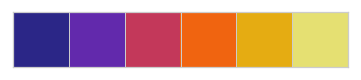

In [2]:
import seaborn as sns; sns.set(color_codes=True)
sns.set_style("whitegrid")
sns.palplot(sns.color_palette("CMRmap"))

In [3]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score

### Loading Data

In [4]:
import sys
sys.path.append('/home/s1/jesteves/git/buzzardAnalysis/mainAnalysis/')
from plotLibrary import viewMembershipSelection

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using Modified sklearn.mixture.GMM, modified to allow data weights


In [5]:
# runs=['emuBPZ-r200','gauss003-r200','gauss005-r200']
# runs=['emuBPZ-rhod','gauss003-rhod','gauss005-rhod']

## the run we take a look into is:
pz_labels = ['gauss001','gauss003','gauss005',None,'dnf_model']
runs= ['%s-rhod'%li for li in pz_labels[:-2]]
runs+= ['dnf-rhod','dnf003-rhod']
#runs= [run1,run2,run3,run4]

In [6]:
x = np.arange(len(runs))
colors = np.array([sns.color_palette("CMRmap")[::1][xx] for xx in x])

In [7]:
root= '/home/s1/jesteves/git/ccopa/'
vm = viewMembershipSelection(cfg=root+'config_files/config_buzzard_v2.yaml',dataset='buzzard_v2')
# vm = viewMembershipSelection(cfg='../config_files/config_copa_dc2.yaml',dataset='cosmoDC2')

master file: 
 /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00000.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00016.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00017.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00018.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00019.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00020.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00022.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00032.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00033.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output

In [8]:
runs = ['gauss001-rhod','gauss005-rhod-zerr']

In [9]:
for run in runs:
    print('run: %s'%run)
    vm.load_data(run)

run: gauss005-rhod-zerr
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA


In [10]:
for run in runs:    
    vm.compute_precision_recall_curves(run,prob='Pmem',th='True')

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Completeness, Purity')

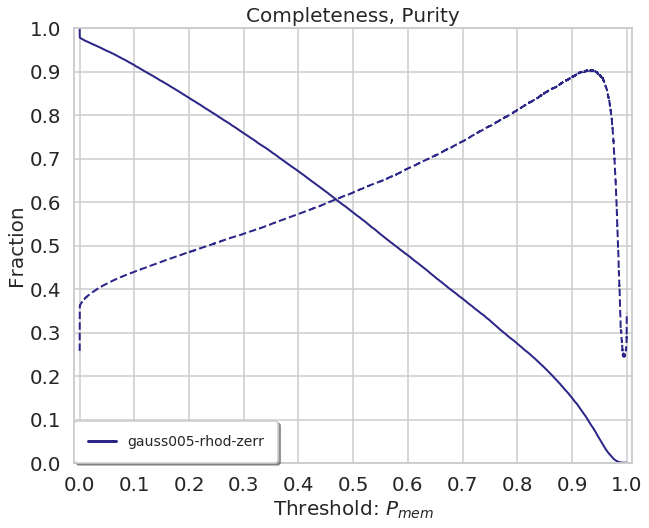

In [11]:
plt.figure(figsize=(10,8))

for color,run in zip(colors,runs):
    plt.axvline(-1.,color=color,label=run,lw=3)

plt.legend(fontsize=14, loc=3, shadow=True, borderaxespad=0.,ncol=int(len(runs)/2),borderpad=1)

for color,run in zip(colors,runs):
    vm.plot_precision_recall_vs_threshold(run,c1=color)
    #plt.legend()
    
plt.xlabel(r'Threshold: $P_{mem}$', fontsize=20)
plt.ylabel('Fraction', fontsize=20)
plt.title('Completeness, Purity',fontsize=20)

Text(0,0.5,'Purity')

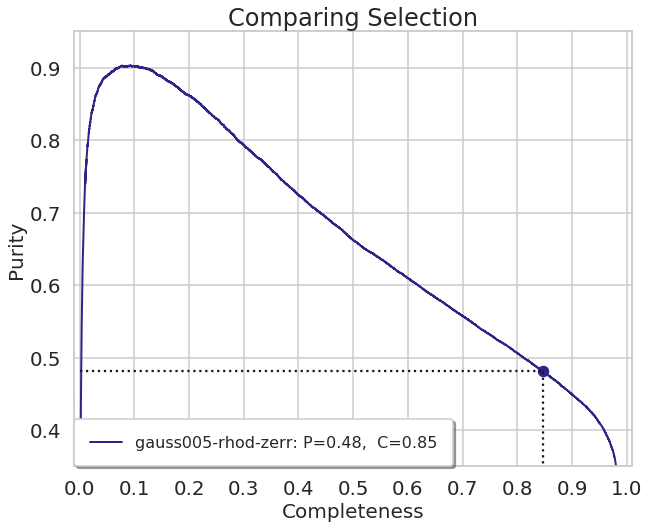

In [12]:
plt.figure(figsize=(10, 8))

for color,run in zip(colors,runs):
    vm.plot_purity_completeness(run,color=color)
    #plt.legend()
plt.ylim(0.35,0.95)
plt.legend(fontsize=16, loc=3, shadow=True, borderaxespad=0.,borderpad=1)
plt.title('Comparing Selection',fontsize=24)

plt.xlabel(r'Completeness', fontsize=20)
plt.ylabel('Purity', fontsize=20)
# plt.title('Completeness, Purity',fontsize=20)

### PDF validation

Copacabana should in priciple recover the PDF of the true members distribution. Here in the plots below, we check the PDF for the variables $R, z, color$

In [13]:
def getTruthTable(gal):
    gal2 = gal[gal['True']==True].copy()
    gal2['Pmem'] = 1.
    return gal2

In [14]:
gal = vm.datasets[runs[0]]
gal2= getTruthTable(gal)
keys = np.unique(gal['CID'])

In [15]:
from plotLibrary import generalPlots

In [16]:
allPlots = generalPlots(title='Buzzard')

In [ ]:
allPlots.plot_validation_pdf_redshift(gal,gal2,keys)

/home/s1/jesteves/git/ccopa/python/copac/gaussianKDE.py:22: RuntimeWarning: invalid value encountered in divide
  self.weights = weights / np.sum(weights)
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/numpy/linalg/linalg.py:1874: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/s1/jesteves/git/ccopa/python/copac/gaussianKDE.py:105: RuntimeWarning: invalid value encountered in divide
  self._data_covariance /= (1 - np.sum(self.weights ** 2))


In [ ]:
allPlots.plot_validation_pdf_radial(gal,gal2,keys)

In [ ]:
allPlots.plot_grid_histograms(gal)

In [21]:
mask = gal['True'].astype(bool)
dmag = gal['dmag']
zcls = gal['redshift']

Mr   = gal['rabs']
mi   = gal['iobs']

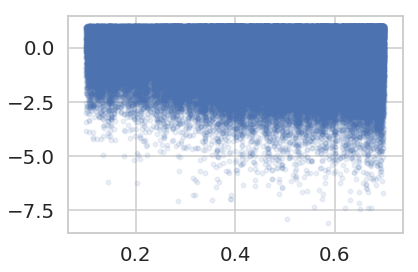

In [22]:
plt.scatter(zcls,dmag,s=20,alpha=0.1)

In [45]:
def get_percentile_curve(x,y,xbins,alpha=5):
    keys = get_bins_group_indices(x,xbins)
    upper= np.array([np.nanpercentile(y[idx],100-alpha) for idx in keys])
    lower= np.array([np.nanpercentile(y[idx],alpha) for idx in keys])
    xb   = (xbins[1:]+xbins[:-1])/2.
    return xb, lower, upper

In [69]:
xb, xlt, xut = get_percentile_curve(zcls[mask],Mr[mask],np.linspace(0.08,0.72,21),alpha=0.3)
xb, xl, xu = get_percentile_curve(zcls,Mr,np.linspace(0.08,0.72,21),alpha=0.3)

(-19.5, -26)

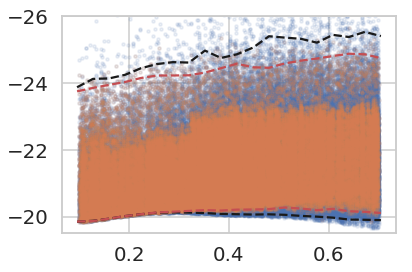

In [70]:
plt.scatter(zcls,Mr,s=10,alpha=0.1)
plt.scatter(zcls[mask],Mr[mask],s=10,alpha=0.1)

plt.plot(xb,xu,'k--')
plt.plot(xb,xl,'k--')

plt.plot(xb,xut,'r--')
plt.plot(xb,xlt,'r--')

plt.ylim(-19.5,-26)

In [65]:
# vm.datasets[runs[0]]

In [25]:
def get_bins_group_indices(x,bins):
    idx  = np.argsort(x)
    ## to avoid the boundary condition of the digitize function as xlow <= x < xup
    mybins = bins.copy()
    mybins[-1] += 0.1
    inds = np.digitize(x,mybins)
    return np.split(idx, np.unique(inds[idx], return_index=True)[1][1:])